In [15]:
import scanpy as sc
import pandas as pd
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score
import matplotlib.pyplot as plt

In [2]:
adata = sc.read_h5ad('data/gene_sorted_filtered_matrix.h5ad').T
barcodes = pd.read_csv('data/barcodes_filtered.tsv', header=None, sep='\t')
genes = pd.read_csv('data/genes.tsv', header=None, sep='\t')
ground_truth_labels = pd.read_csv('data/ground_truth_labels.tsv', sep='\t')


In [3]:
adata.obs_names = barcodes[0].values
adata.var_names = genes[0].values

ground_truth_labels = ground_truth_labels.set_index("NAME")  
adata.obs['ground_truth_labels'] = adata.obs_names.map(ground_truth_labels["New_cellType"])

print(adata.shape)
print(barcodes.shape)
print(genes.shape)

(9381, 19712)
(9381, 1)
(19712, 2)


In [4]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)
print(adata.shape)

(9381, 15966)


In [5]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [6]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, flavor="igraph", n_iterations=2)

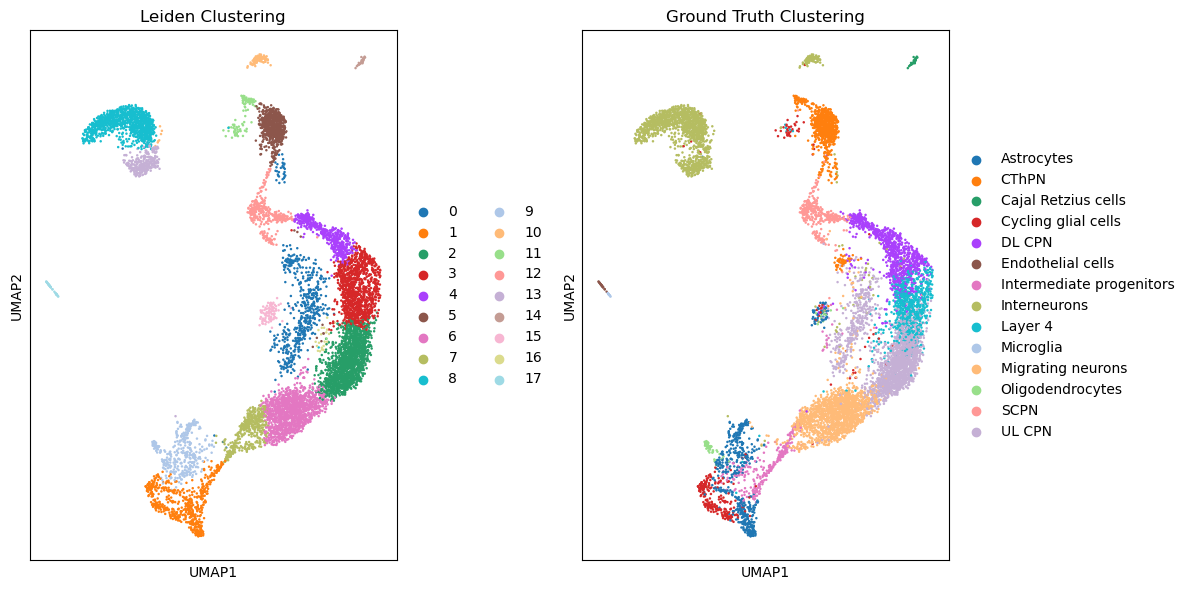

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sc.pl.umap(adata, color="leiden", ax=ax[0], title="Leiden Clustering", show=False)

sc.pl.umap(adata, color="ground_truth_labels", ax=ax[1], title="Ground Truth Clustering", show=False)

plt.tight_layout()  
plt.show()

In [26]:
ground_truth_labels = adata.obs['ground_truth_labels'].values
leiden_labels = adata.obs['leiden'].values

ami = adjusted_mutual_info_score(ground_truth_labels, leiden_labels)
ari = adjusted_rand_score(ground_truth_labels, leiden_labels)

print("Adjusted Mutual Information: ", ami)
print("Adjusted Rand Index: ", ari)


Adjusted Mutual Information:  0.7193587835092674
Adjusted Rand Index:  0.6079826853479858
